In [20]:
import warnings
warnings.filterwarnings('ignore')

**IMPORTING NECESSARY LIBRARIES**

In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay   


**_Experiment 1: Loading Dataset_**

In [22]:
# Experiment 1: Loading dataset
data = pd.read_csv('student/student-mat.csv', sep=';')

**_Experiment 2: Data Preprocessing_**

_Preprocessing transforms raw data into a form that is more understandable and usable by machine learning algorithms, ultimately improving the quality and reliability of the results._

In [23]:
print("Missing values per column:")
print(data.isnull().sum())


Missing values per column:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


**_LABEL ENCODING_**

_Label encoding is a technique used to convert categorical text data into numerical form so that machine learning algorithms can process it. It assigns each unique category in a feature a distinct integer value. The purpose of label encoding is to transform non-numeric labels into a format that can be easily understood and used by models, especially those that require numerical input. This method is simple and effective for ordinal data or categorical variables with a clear ordering._

In [24]:
data_encoded = data.copy()
label_encoders = {}
for col in data_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    label_encoders[col] = le

**_STANDARDISATION (NORMALISATION)_**

_Standard scaling is a data preprocessing technique that transforms features to have a mean of zero and a standard deviation of one. This normalization ensures that all features contribute equally to the model by removing the effects of different scales or units. Standard scaling is especially important for algorithms that rely on distance calculations or gradient-based optimization, as it improves convergence speed and model performance._

In [25]:
scaler = StandardScaler()
numeric_cols = data_encoded.select_dtypes(include=['int64', 'float64']).columns.drop(['G3'])
data_encoded[numeric_cols] = scaler.fit_transform(data_encoded[numeric_cols])

_**SPLITTING DATASET**_

_Train-test split is a process used in machine learning to divide the dataset into two parts: a training set and a testing set. The training set is used to train the model, allowing it to learn patterns and relationships in the data. The testing set is kept separate and used to evaluate the model's performance on unseen data. This split helps to assess how well the model generalizes to new data and prevents overfitting, ensuring the model's predictions are reliable and robust._

In [26]:
X = data_encoded.drop('G3', axis=1)
y = data_encoded['G3']

# Binary target: pass if G3 >= 10 else fail
y_binary = (y >= 10).astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

**_Generic function for confusion matrix_**

_It's a summary table used for classification problems, especially binary classification. It shows the actual vs. predicted classifications in a matrix format._

In [27]:
def plot_confusion(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()


**_Generic function for ROC curve_**


_The ROC curve is a graphical plot that shows the diagnostic ability of a binary classifier system as its discrimination threshold is varied._


In [28]:
def plot_roc_curve(model, X_test, y_test, model_name):
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(4, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()


**_Experiment: 3_**

_**LOGISTIC REGRESSION**_

_Logistic regression is a supervised machine learning algorithm used for binary classification tasks. It models the probability that a given input belongs to a particular class by applying the logistic (sigmoid) function to a linear combination of input features. The output is a value between 0 and 1, representing the likelihood of the positive class. Logistic regression is widely used due to its simplicity, interpretability, and effectiveness in problems where the relationship between features and the target is approximately linear._

Logistic Regression Performance:
Accuracy: 0.9367
Precision: 0.9608
Recall: 0.9423
F1-score: 0.9515


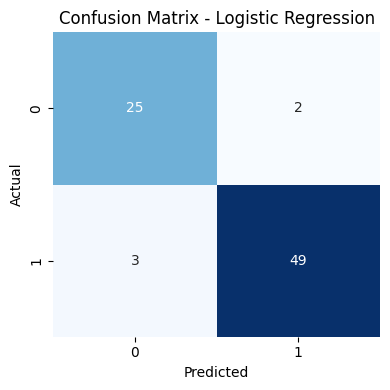

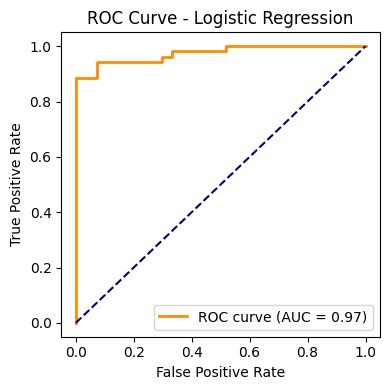

In [29]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_logreg):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_logreg):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_logreg):.4f}")

plot_confusion(y_test, y_pred_logreg, "Logistic Regression")
plot_roc_curve(logreg, X_test, y_test, "Logistic Regression")

**_Experiment: 4_**

_**NAIVE BAYES**_

_Naive Bayes is a family of simple probabilistic classifiers based on Bayes' theorem with the assumption of feature independence. It calculates the probability of each class given the input features and predicts the class with the highest posterior probability. Despite its "naive" assumption that features are independent, it performs well in many real-world applications, especially in text classification and spam detection, due to its efficiency and effectiveness with high-dimensional data_

Naive Bayes Performance:
Accuracy: 0.8734
Precision: 0.8889
Recall: 0.9231
F1-score: 0.9057
Confusion Matrix:
[[21  6]
 [ 4 48]]


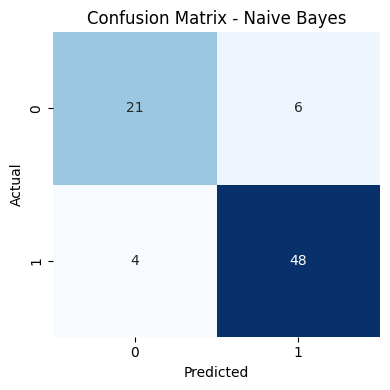

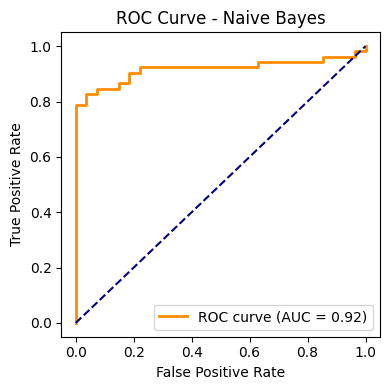

In [30]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_nb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_nb):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_nb):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

plot_confusion(y_test, y_pred_nb, "Naive Bayes")
plot_roc_curve(nb, X_test, y_test, "Naive Bayes")

**_Experiment: 5_**

_**DECISION TREE**_

_A decision tree is a supervised machine learning algorithm used for classification and regression tasks. It models decisions and their possible consequences as a tree-like structure, where each internal node represents a test on a feature, each branch represents the outcome of the test, and each leaf node represents a class label or continuous value. Decision trees are intuitive, easy to interpret, and can handle both numerical and categorical data. They work by recursively splitting the data based on feature values to maximize the separation of classes or minimize prediction error._

Decision Tree Performance:
Accuracy: 0.8861
Precision: 0.9216
Recall: 0.9038
F1-score: 0.9126


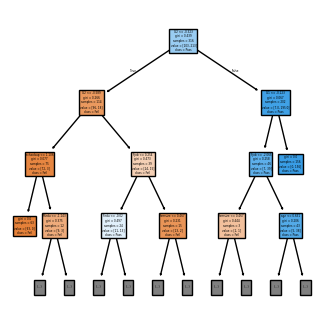

In [31]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_dt):.4f}")
plt.figure(figsize=(4,4))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['Fail', 'Pass'], max_depth=3)
plt.show()

**_Experiment: 6_**

**_RANDOM FOREST_**

_Random Forest Classifier is a specific implementation of the Random Forest algorithm used for classification problems. It builds multiple decision trees during training and outputs the class that is the mode of the classes predicted by individual trees. This classifier improves accuracy and controls overfitting by averaging multiple trees trained on different subsets of data and features, making it a powerful and widely used method for classification tasks._

Random Forest Performance:
Accuracy: 0.8987
Precision: 0.9400
Recall: 0.9038
F1-score: 0.9216


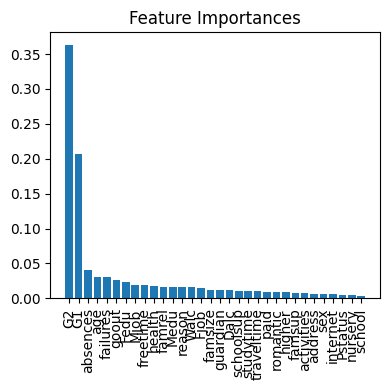

In [32]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_rf):.4f}")
importances = rf.feature_importances_
indices = importances.argsort()[::-1]
plt.figure(figsize=(4,4))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

**_Experiment: 7_**

**_K-NEAREST NEIGHBOURS_**

_K-Nearest Neighbors (KNN) Classifier is a simple, instance-based supervised learning algorithm used for classification tasks. It classifies a data point based on the majority class among its K closest neighbors in the feature space, where closeness is typically measured using distance metrics like Euclidean distance. KNN is intuitive, non-parametric, and effective for datasets where similar instances tend to belong to the same class, but it can be computationally expensive for large datasets._

KNN Performance:
Accuracy: 0.7215
Precision: 0.7500
Recall: 0.8654
F1-score: 0.8036


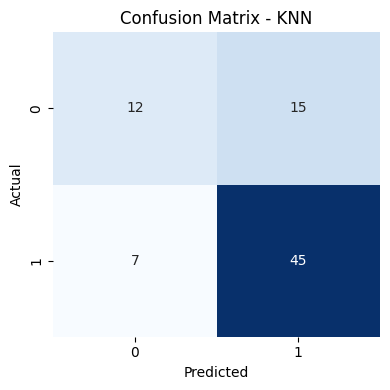

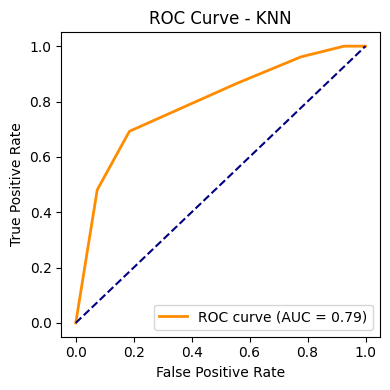

In [33]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_knn):.4f}")

plot_confusion(y_test, y_pred_knn, "KNN")
plot_roc_curve(knn, X_test, y_test, "KNN")

**_Experiment: 8_**

**_K-MEANS CLUSTERING_**

_K-Means Clustering is an unsupervised machine learning algorithm used to partition data into K distinct clusters based on feature similarity. It works by initializing K centroids, assigning each data point to the nearest centroid, and then iteratively updating the centroids to minimize the within-cluster variance. The algorithm continues until convergence, grouping similar data points together without using labeled data. K-Means is widely used for pattern discovery and data segmentation._

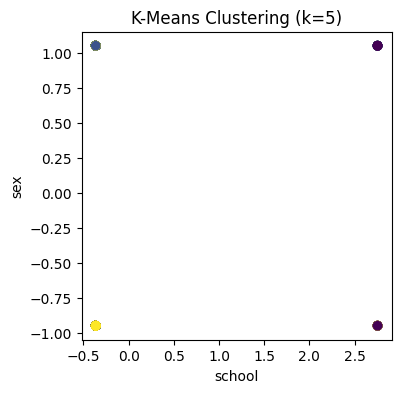

In [34]:
X_unsupervised = X.copy()
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_unsupervised)
plt.figure(figsize=(4,4))
plt.scatter(X_unsupervised.iloc[:,0], X_unsupervised.iloc[:,1], c=clusters, cmap='viridis')
plt.xlabel(X_unsupervised.columns[0])
plt.ylabel(X_unsupervised.columns[1])
plt.title('K-Means Clustering (k=5)')
plt.show()

**_Experiment: 9_**

**_PRINCIPAL COMPONENT ANALYSIS_**

_Principal Component Analysis (PCA) is a dimensionality reduction technique used to transform high-dimensional data into a lower-dimensional space while preserving as much variance as possible. It identifies new uncorrelated variables called principal components, which are linear combinations of the original features. PCA helps simplify data visualization, reduce noise, and improve computational efficiency in machine learning tasks by focusing on the most important patterns in the data._

_Steps for calculating Principal Component Analysis (PCA):_

_1. Standardize the Data: Scale the features to have zero mean and unit variance to ensure equal contribution._

_2. Compute the Covariance Matrix: Calculate the covariance matrix to understand how variables vary together._

_3. Calculate Eigenvalues and Eigenvectors: Find the eigenvalues and eigenvectors of the covariance matrix to identify principal components._

_4. Sort Eigenvalues and Select Principal Components: Rank eigenvalues in descending order and select the top components that capture the most variance._

_5. Transform the Data: Project the original data onto the selected principal components to obtain the reduced-dimensional representation._

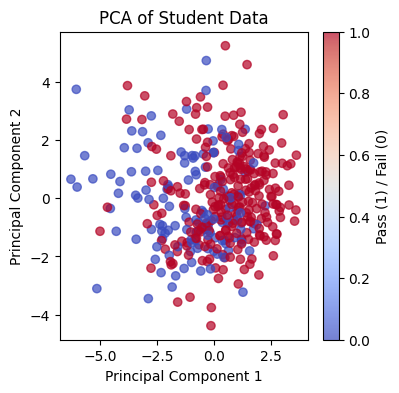

Explained variance ratio: [0.10761625 0.07815344]


In [35]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
plt.figure(figsize=(4,4))
plt.scatter(principal_components[:,0], principal_components[:,1], c=y_binary, cmap='coolwarm', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Student Data')
plt.colorbar(label='Pass (1) / Fail (0)')
plt.show()
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

**_Experiment: 10_**

**_RANDOM FOREST ON PCA_**

_Random Forest on PCA data involves applying the Random Forest classifier to the dataset after it has been transformed using Principal Component Analysis (PCA). PCA reduces the dimensionality of the data by extracting the most important features (principal components), which helps to remove noise and redundant information. Training a Random Forest on this reduced data can improve computational efficiency and sometimes enhance model performance by focusing on the most relevant features while maintaining the ensemble's robustness and accuracy._

Random Forest on PCA Data Performance:
Accuracy: 0.6835
Precision: 0.7288
Recall: 0.8269
F1-score: 0.7748


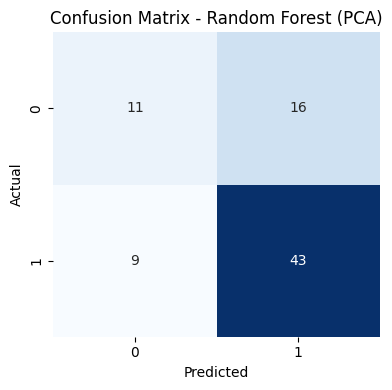

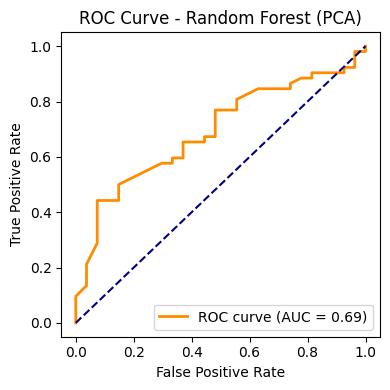

In [36]:
X_pca = principal_components
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_binary, test_size=0.2, random_state=42)
rf_pca = RandomForestClassifier(random_state=42)
rf_pca.fit(X_train_pca, y_train_pca)
y_pred_rf_pca = rf_pca.predict(X_test_pca)
print("Random Forest on PCA Data Performance:")
print(f"Accuracy: {accuracy_score(y_test_pca, y_pred_rf_pca):.4f}")
print(f"Precision: {precision_score(y_test_pca, y_pred_rf_pca):.4f}")
print(f"Recall: {recall_score(y_test_pca, y_pred_rf_pca):.4f}")
print(f"F1-score: {f1_score(y_test_pca, y_pred_rf_pca):.4f}")

plot_confusion(y_test_pca, y_pred_rf_pca, "Random Forest (PCA)")
plot_roc_curve(rf_pca, X_test_pca, y_test_pca, "Random Forest (PCA)")

**_Experiment: 11_**

**_ADAPTIVE BOOSTING_**

_AdaBoost (Adaptive Boosting) classifier is an ensemble learning method that combines multiple weak classifiers, typically decision trees, to create a strong classifier. It works by sequentially training classifiers, where each subsequent classifier focuses more on the misclassified instances from the previous ones. AdaBoost assigns weights to training samples and updates them iteratively to improve accuracy. This method is effective in reducing bias and variance, leading to improved classification performance._

AdaBoost Performance:
Accuracy: 0.8861
Precision: 0.9216
Recall: 0.9038
F1-score: 0.9126


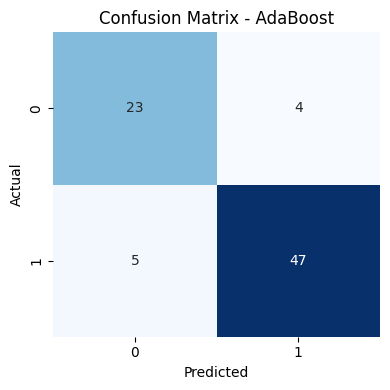

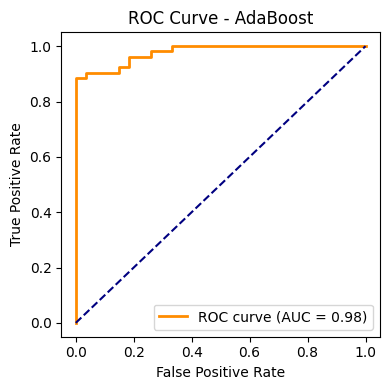

In [37]:
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
print("AdaBoost Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ada):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_ada):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_ada):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_ada):.4f}")

plot_confusion(y_test, y_pred_ada, "AdaBoost")
plot_roc_curve(ada, X_test, y_test, "AdaBoost")

**_Experiment: 12_**

**_EVALUATING PERFORMANCE BETWEEN SUPERVISED AND UNSUPERVISED MODEL ACCURACIES_**

In [38]:
sil_score = silhouette_score(X_unsupervised, clusters)
print(f"Silhouette Score for K-Means clustering: {sil_score:.4f}")
supervised_accuracies = {
    'Logistic Regression': accuracy_score(y_test, y_pred_logreg),
    'Naive Bayes': accuracy_score(y_test, y_pred_nb),
    'Decision Tree': accuracy_score(y_test, y_pred_dt),
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'KNN': accuracy_score(y_test, y_pred_knn),
    'AdaBoost': accuracy_score(y_test, y_pred_ada)
}
print("Supervised Model Accuracies:")
for model, acc in supervised_accuracies.items():
    print(f"{model}: {acc:.4f}")
print("\nDiscussion:")
print("- Supervised models provide direct accuracy metrics based on labeled data.")
print("- Unsupervised clustering is evaluated using silhouette score, which measures cluster cohesion and separation.")
print("- Supervised models generally perform better for prediction tasks when labels are available.")
print("- Clustering can reveal hidden patterns but may not align perfectly with labels.")

Silhouette Score for K-Means clustering: 0.0435
Supervised Model Accuracies:
Logistic Regression: 0.9367
Naive Bayes: 0.8734
Decision Tree: 0.8861
Random Forest: 0.8987
KNN: 0.7215
AdaBoost: 0.8861

Discussion:
- Supervised models provide direct accuracy metrics based on labeled data.
- Unsupervised clustering is evaluated using silhouette score, which measures cluster cohesion and separation.
- Supervised models generally perform better for prediction tasks when labels are available.
- Clustering can reveal hidden patterns but may not align perfectly with labels.
